# Predictive Health Assessment: Leveraging DHS Data for Targeted Interventions in Kenya


**Authors**: [Alpha Guya](mailto:alpha.guya@student.moringaschool.com), [Ben Ochoro](mailto:ben.ochoro@student.moringaschool.com), [Caleb Ochieng](mailto:caleb.ochieng@student.moringaschool.com), [Christine Mukiri](mailto:christine.mukiri@student.moringaschool.com), [Dominic Muli](mailto:dominic.muli@student.moringaschool.com), [Frank Mandele](mailto:frank.mandele@student.moringaschool.com), [Jacquiline Tulinye](mailto:jacquiline.tulinye@student.moringaschool.com) and [Lesley Wanjiku](mailto:lesley.wanjiku@student.moringaschool.com)

## 1.0) Project Overview

Our project focuses on using machine learning techniques and data sourced from the Demographic and Health Surveys (DHS) program to generate predictive models aimed at evaluating individual and household health risks in Kenya. By analyzing various set of demographic, socio-economic, and health-related indicators, we target to develop reliable predictive models capable of estimating the likelihood of malnutrition, disease prevalence, and various health risks within certain communities. The goal is to provide users such as public health officials with targeted insights. This will enable more effective allotment of resources and interventions. This proactive approach is geared to optimize the impact of health initiatives, allowing for the prioritization and customization of interventions to at risk populations, ultimately contributing to the improvement of health outcomes in Kenya.

## 1.1) Business Problem

Despite existing health interventions, Kenya encounters difficulties in effectively targeting resources and interventions. This will help to address individual and household health risks, including malnutrition, diseases, and other health concerns. This fault highlights the need for a predictive and targeted approach to allocate resources and interventions more effectively. Leveraging machine learning models built upon Demographic and Health Surveys (DHS) data, the project aims to develop predictive models capable of assessing the likelihood of malnutrition, disease prevalence, and health risks based on individual and household characteristics. By accurately identifying at-risk populations, this solution seeks to empower decision-makers and public health officials to allocate resources on need basis, ultimately increasing the impact of health interventions and improving overall health outcomes in Kenya.

## 1.2) Objectives


Based on the data provided by DHS(Demographic and Health Surveys) , some of the objectives include:

* To analyze trends in health indicators over time.

* To predict Health Risks based on individual and household characteristics. 

* To find the relationship between the most common diseases and the demographic.

*  To Build predictive models to estimate health outcomes based on various demographic and socio-economic factors.

*  To identify regional variations in health indicators.

* To Identify factors contributing to changes in health outcomes.

* To Conduct comprehensive feature engineering to extract relevant features from DHS data, considering demographic, socio-economic, and health-related variables.


### API Deployment and Usability

Deploy an accessible API interface for stakeholders to input data and receive health risk predictions based on the developed models.

### Recommendations and Conclusion
* Targeted Intervention Recommendations:

Utilize model predictions to generate targeted recommendations for health interventions and resource allocation in specific Kenyan communities.

* Impact Assessment and Validation:

Assess the real-world impact of model-guided interventions by monitoring and evaluating changes in health outcomes in targeted Kenyan populations.

## 1.3) Metric of Success

* Achieve a predictive accuracy of at least 90% on unseen validation data.
* Identify and utilize the top 10 most influential features contributing to the models' predictive power.
* Generate clear and interpretable explanations for at least 70% of model predictions.
* Create a prioritized list of actionable recommendations based on identified health risks for at least 100 of communities.
* Ensure an API uptime of at least 90% and gather feedback on usability for further improvements.
* Measure the effectiveness of interventions by observing changes in health indicators, aiming for improvements in at least 80% of targeted communities.

## 1.4) Data Relevance and Validation

The data available is relevant for the intended analysis and predictions

## 2.0) Understanding the Data

The data for this project is obtained from the [DHS Program website](https://dhsprogram.com/data/dataset/Kenya_Standard-DHS_2022.cfm?flag=0).
The encoding for this dataset is explained [here](./Recode7_DHS_10Sep2018_DHSG4.pdf).

## 2.1) Reading the Data

### 2.1.1) Installations

In [9]:
# # installations
# %pip install requests
# %pip install pyreadstat
# %pip install --upgrade openpyxl

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Requirement already up-to-date: openpyxl in c:\users\hp\anaconda3\envs\learn-env\lib\site-packages (3.1.2)
Note: you may need to restart the kernel to use updated packages.


### 2.1.2) Importing Relevant Libraries

In [1]:
# importing necessary libraries
import requests, json
import urllib
import urllib.request
import urllib.error
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

### 2.1.3) Reading the Data

Observation: we will work with

In [3]:
# Reading downloaded relevant data
malaria_df, meta = pyreadstat.read_sav("data/malaria variables.SAV")
# Preview
malaria_df.head()

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,SML16A$15,SML16A$16,SML16A$17,SML16A$18,SML16A$19,SML16A$20,SML16A$21,SML16A$22,SML16A$23,SML16A$24
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Dimensions
malaria_df.shape

(7952, 1955)

In [5]:
# Data summary
malaria_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7952 entries, 0 to 7951
Columns: 1955 entries, HHID to SML16A$24
dtypes: float64(1929), object(26)
memory usage: 118.6+ MB


In [6]:
# Statistical summary
malaria_df.describe()

,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,HV008A,HV009,...,SML16A$15,SML16A$16,SML16A$17,SML16A$18,SML16A$19,SML16A$20,SML16A$21,SML16A$22,SML16A$23,SML16A$24
count,7952.000000,7952.000000,7952.000000,7952.000000,7.952000e+03,7952.000000,7952.0,7952.000000,7952.000000,7952.000000,...,12.000000,6.000000,6.000000,5.000000,2.000000,1.0,1.0,0.0,0.0,1.0
mean,3734.393360,65.458249,1.469064,3734.393360,1.000000e+06,11.386444,2020.0,1451.386444,44161.558602,3.936368,...,75.833333,31.833333,79.833333,81.400000,89.500000,65.0,42.0,NaN,NaN,22.0
std,2618.926631,53.380244,0.691540,2618.926631,1.554606e+06,0.486965,0.0,0.486965,11.489709,2.463717,...,46.863115,24.210879,48.255224,58.217695,34.648232,NaN,NaN,NaN,NaN,NaN
min,2.000000,1.000000,1.000000,2.000000,1.178700e+04,11.000000,2020.0,1451.000000,44144.000000,1.000000,...,6.000000,8.000000,33.000000,13.000000,65.000000,65.0,42.0,NaN,NaN,22.0
25%,1807.000000,28.000000,1.000000,1807.000000,2.829410e+05,11.000000,2020.0,1451.000000,44151.000000,2.000000,...,47.250000,19.750000,46.250000,41.000000,77.250000,65.0,42.0,NaN,NaN,22.0
50%,3293.000000,58.000000,1.000000,3293.000000,5.517490e+05,11.000000,2020.0,1451.000000,44160.000000,4.000000,...,62.000000,24.500000,63.500000,79.000000,89.500000,65.0,42.0,NaN,NaN,22.0
75%,4939.000000,93.000000,2.000000,4939.000000,9.834160e+05,12.000000,2020.0,1452.000000,44172.000000,5.000000,...,119.750000,35.250000,107.000000,114.000000,101.750000,65.0,42.0,NaN,NaN,22.0
max,9186.000000,2172.000000,10.000000,9186.000000,1.409980e+07,12.000000,2020.0,1452.000000,44185.000000,24.000000,...,144.000000,77.000000,157.000000,160.000000,114.000000,65.0,42.0,NaN,NaN,22.0


## 2.2) Data Cleaning

In [7]:
# column_list = ['SH119', 'SH130$1', 'SH130$2', 'SH130$3', 'SH130$4', 'SH130$5', 'SH130$6', 'SH130$7', 'HML32$01', 'HML32$02', 'HML32$03', 
#               'HML32$04', 'HML32$05', 'HML32$06', 'HML32$07', 'HML32$08', 'HML32$09', 'HML32$10', 'HML32$11', 'HML32$12', 'HML32$13', 
#               'HML32$14', 'HML32$15', 'HML32$16', 'HML32$17', 'HML32$18', 'HML32$19', 'HML32$20', 'HML32$21', 'HML32$22', 'HML32$23', 
#               'HML32$24', 'HML35$01', 'HML35$02', 'HML35$03', 'HML35$04', 'HML35$05', 'HML35$06', 'HML35$07', 'HML35$08', 'HML35$09', 
#               'HML35$10', 'HML35$11', 'HML35$12', 'HML35$13', 'HML35$14', 'HML35$15', 'HML35$16', 'HML35$17', 'HML35$18', 'HML35$19', 
#               'HML35$20', 'HML35$21', 'HML35$22', 'HML35$23', 'HML35$24', 'HML33$01', 'HML33$02', 'HML33$03', 'HML33$04', 'HML33$05', 
#               'HML33$06', 'HML33$07', 'HML33$08', 'HML33$09', 'HML33$10', 'HML33$11', 'HML33$12', 'HML33$13', 'HML33$14', 'HML33$15', 
#               'HML33$16', 'HML33$17', 'HML33$18', 'HML33$19', 'HML33$20', 'HML33$21', 'HML33$22', 'HML33$23', 'HML33$24', 'HC57$01', 
#               'HC57$02', 'HC57$03', 'HC57$04', 'HC57$05', 'HC57$06', 'HC57$07', 'HC57$08', 'HC57$09', 'HC57$10', 'HC57$11', 'HC57$12', 
#               'HC57$13', 'HC57$14', 'HC57$15', 'HC57$16', 'HC57$17', 'HC57$18', 'HC57$19', 'HC57$20', 'SB115A$01', 'SB115A$02', 
#               'SB115A$03', 'SB115A$04', 'SB115A$05', 'SB115A$06', 'SB115A$07', 'SB115A$08', 'SB115A$09', 'SB115A$10', 'SB115A$11', 
#               'SB115A$12', 'SB115A$13', 'SB115A$14', 'SB115A$15', 'SB115A$16', 'SB115A$17', 'SB115A$18', 'SB115A$19', 'SB115A$20', 
#               'SB115B$01', 'SB115B$02', 'SB115B$03', 'SB115B$04', 'SB115B$05', 'SB115B$06', 'SB115B$07', 'SB115B$08', 'SB115B$09', 
#               'SB115B$10', 'SB115B$11', 'SB115B$12', 'SB115B$13', 'SB115B$14', 'SB115B$15', 'SB115B$16', 'SB115B$17', 'SB115B$18', 
#               'SB115B$19', 'SB115B$20', 'SB115C$01', 'SB115C$02', 'SB115C$03', 'SB115C$04', 'SB115C$05', 'SB115C$06', 'SB115C$07', 
#               'SB115C$08', 'SB115C$09', 'SB115C$10', 'SB115C$11', 'SB115C$12', 'SB115C$13', 'SB115C$14', 'SB115C$15', 'SB115C$16', 
#               'SB115C$17', 'SB115C$18', 'SB115C$19', 'SB115C$20', 'SB115D$01', 'SB115D$02', 'SB115D$03', 'SB115D$04', 'SB115D$05', 
#               'SB115D$06', 'SB115D$07', 'SB115D$08', 'SB115D$09', 'SB115D$10', 'SB115D$11', 'SB115D$12', 'SB115D$13', 'SB115D$14', 
#               'SB115D$15', 'SB115D$16', 'SB115D$17', 'SB115D$18', 'SB115D$19', 'SB115D$20', 'SB115E$01', 'SB115E$02', 'SB115E$03', 
#               'SB115E$04', 'SB115E$05', 'SB115E$06', 'SB115E$07', 'SB115E$08', 'SB115E$09', 'SB115E$10', 'SB115E$11', 'SB115E$12', 
#               'SB115E$13', 'SB115E$14', 'SB115E$15', 'SB115E$16', 'SB115E$17', 'SB115E$18', 'SB115E$19', 'SB115E$20', 'SB115F$01', 
#               'SB115F$02', 'SB115F$03', 'SB115F$04', 'SB115F$05', 'SB115F$06','SB115F$07', 'SB115F$08', 'SB115F$09', 'SB115F$10', 
#               'SB115F$11', 'SB115F$12', 'SB115F$13', 'SB115F$14', 'SB115F$15', 'SB115F$16', 'SB115F$17', 'SB115F$18', 'SB115F$19', 
#               'SB115F$20', 'SB115G$01', 'SB115G$02', 'SB115G$03', 'SB115G$04', 'SB115G$05', 'SB115G$06', 'SB115G$07', 'SB115G$08', 
#               'SB115G$09', 'SB115G$10', 'SB115G$11', 'SB115G$12', 'SB115G$13', 'SB115G$14', 'SB115G$15', 'SB115G$16', 'SB115G$17', 
#               'SB115G$18', 'SB115G$19', 'SB115G$20', 'SB115H$01', 'SB115H$02', 'SB115H$03', 'SB115H$04', 'SB115H$05', 'SB115H$06', 
#               'SB115H$07', 'SB115H$08', 'SB115H$09', 'SB115H$10', 'SB115H$11', 'SB115H$12', 'SB115H$13', 'SB115H$14', 'SB115H$15', 
#               'SB115H$16', 'SB115H$17', 'SB115H$18', 'SB115H$19', 'SB115H$20', 'SB119$01', 'SB119$02', 'SB119$03', 'SB119$04', 'SB119$05', 
#               'SB119$06', 'SB119$07', 'SB119$08', 'SB119$09', 'SB119$10', 'SB119$11', 'SB119$12', 'SB119$13', 'SB119$14', 'SB119$15', 
#               'SB119$16', 'SB119$17', 'SB119$18', 'SB119$19', 'SB119$20', 'SB122$01', 'SB122$02', 'SB122$03', 'SB122$04', 'SB122$05', 
#               'SB122$06', 'SB122$07', 'SB122$08', 'SB122$09', 'SB122$10', 'SB122$11', 'SB122$12', 'SB122$13', 'SB122$14', 'SB122$15', 
#               'SB122$16', 'SB122$17', 'SB122$18', 'SB122$19', 'SB122$20', 'HML5$1', 'HML5$2', 'HML5$3', 'HML5$4', 'HML5$5', 'HML5$6', 
#               'HML5$7', 'HML8$1']

**Renaming columns in `malaria_df`**

In [13]:
# Saving columns to a variable
col_names = malaria_df.columns
# Creating a df with column names only
col_names_df = pd.DataFrame(col_names, columns=["Column Names"])
# Excel path
excel_path = 'malaria_column_names.xlsx'
# Writing df to excel file
col_names_df.to_excel(excel_path, index=False)

In [14]:
# Converting column names to labels dict to a DataFrame
labels_df = pd.DataFrame(list(meta.column_names_to_labels.items()), columns=['Column Name', 'Label'])
# Saving to Excel file
excel_path = 'malaria_col_names_to_labels.xlsx'
labels_df.to_excel(excel_path, index=False)

**Missing values**

In [16]:
# Checking percentage of missing values
def missing_values_summary(df):
    """
    Generate a summary of missing values for each column in a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - DataFrame containing columns with NaN values and their percentages
    """

    # Checking percentage of missing values
    nan_info = df.isna().sum()
    nan_percentage = (nan_info / len(df)) * 100

    # Creating a DataFrame with columns and their NaN percentages
    nan_df = pd.DataFrame({'Column': nan_info.index, 'NaN Count': nan_info.values, 'NaN Percentage': nan_percentage.values})

    # Filtering columns with NaN values
    columns_with_nan = nan_df[nan_df['NaN Count'] > 0]

    return columns_with_nan


# Calling the function on df_cleaned
result = missing_values_summary(malaria_df)
# result.tail()
result

,Column,NaN Count,NaN Percentage
13,HV011,7952,100.000000
21,HV019,7952,100.000000
28,HV026,7952,100.000000
32,HV031,7952,100.000000
33,HV032,7952,100.000000
...,...,...,...
1950,SML16A$20,7951,99.987425
1951,SML16A$21,7951,99.987425
1952,SML16A$22,7952,100.000000
1953,SML16A$23,7952,100.000000


**Collapsing sub-indexed columns**

In [17]:
# import pandas as pd

# def collapse_subindexed_columns(df, identifier):
#     # Create a DataFrame with the relevant columns
#     df_subset = df.filter(like=identifier)
    
#     # Find the most occurring value in each row, ignoring NaN values
#     most_occurred_values = df_subset.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA, axis=1)
    
#     # Return the Series with the most occurred values
#     return most_occurred_values

# # List of identifiers
# identifiers = ['HML32', 'HML33', 'HML35', 'HML5', 'HML8', 'SB115A', 'SB115B', 'SB115C', 'SB115D',
#             'SB115E', 'SB115F', 'SB115G', 'SB115H', 'SB119', 'SB122', 'SH130', 'HC57']

# # Create an empty DataFrame to store the new columns
# new_columns_df = pd.DataFrame()

# # Apply the collapsing process for each identifier on new_df_2
# for identifier in identifiers:
#     new_column = collapse_subindexed_columns(malaria_df, identifier)
#     new_columns_df[f'Most_Occurred_{identifier}'] = new_column

# # Concatenate the two DataFrames along the columns (axis=1)
# result_df = pd.concat([malaria_df, new_columns_df], axis=1)

# # Display the resulting DataFrame
# result_df.head()


In [18]:
# result_df['Most_Occurred_SH130'].value_counts()

In [19]:
def collapse_columns(df, prefix, suffixes, combined_column):
    # Extracting columns with the specified prefix and suffixes
    relevant_columns = [col for col in df.columns if col.startswith(prefix) and any(col.endswith(suffix) for suffix in suffixes)]

    # Creating a new column 'combined_column' with the highest value for each row
    df[combined_column] = df[relevant_columns].max(axis=1)

    # Dropping the original columns
    df.drop(relevant_columns, axis=1, inplace=True)

    return df

def filter_and_exclude_prefix(df, prefix, exclude_first_n=6):
    filtered_columns = [col for col in df.columns if col.startswith(prefix)]
    modified_columns = [col[exclude_first_n:] for col in filtered_columns]
    return modified_columns

In [21]:
columns = ['HML34','HC53', 'HC55','HC57','SB115A','SB115B','SB115C', 'SB115D',
           'SB115E','SB115F','SB115G','SB115H', 'SB119','SB122', 'HML5','HML12']

for i in columns:
    df_2_suffixes = filter_and_exclude_prefix(malaria_df, f'{i}$')
    # print(df_2_suffixes)
    collapse_columns(malaria_df, f'{i}$', df_2_suffixes, f'{i}_combined')

In [22]:
malaria_df.head()

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,SB115C_combined,SB115D_combined,SB115E_combined,SB115F_combined,SB115G_combined,SB115H_combined,SB119_combined,SB122_combined,HML5_combined,HML12_combined
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
malaria_df.shape

(7952, 1656)

In [29]:
# Converting Coded column names into readable column names

# Loading the Excel file with the column names into a Pandas DataFrame
excel_file_path = 'malaria_column_names_dictionary.xlsx'
df_excel = pd.read_excel(excel_file_path, sheet_name='Sheet1')

# Displaying the original DataFrame with the column headers
print("Original Excel DataFrame:")
print(df_excel)
print(80*'-')

print('Readable Columns DataFrame:')
# Replacing the column headers using a for loop
for old_header, new_header in zip(malaria_df.columns, df_excel['Label Names']):
    malaria_df.rename(columns={old_header: new_header}, inplace=True)

# Displaying the DataFrame with the updated column headers
malaria_df.head()

Original Excel DataFrame:
         Column Names                 Label Names  \
0                HHID                household_id   
1               HV000                country_code   
2               HV001             cluster_number    
3               HV002            household_number   
4               HV003  respondent's_ line_number    
...               ...                         ...   
1984  HML32C_combined               ovale_present   
1985  HML32D_combined               vivax_present   
1986  HML32E_combined                  cs_present   
1987  HML32F_combined              presence_of_cs   
1988  HML32G_combined         na_presence_of_cs_g   

                                            Description Unnamed: 3 Unnamed: 4  
0                                   Case Identification        NaN        NaN  
1                                Country code and phase        NaN        NaN  
2                                        Cluster number        NaN        NaN  
3                

,household_id,country_code,cluster_number,household_number,respondent's_ line_number,area_unit,sample_weight,month_of_the_household_interview,year_of_the_household_interview,month_date_of_household_interview,...,final_blood_smear_test_4,final_blood_smear_test_5,final_blood_smear_test_6,final_blood_smear_test_7,final_blood_smear_test_8,final_blood_smear_test_9,final_blood_smear_test_10,final_blood_smear_test_11,final_blood_smear_test_12,final_blood_smear_test_13
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Variable label dictionary
variable_label = meta.variable_value_labels

In [31]:
def get_variable_label(column_label, df_excel, variable_labels):
    '''Function to get variable label'''
    # Looking up the column label
    matching_row = df_excel[df_excel['Label Names'] == column_label]

    # Getting the corresponding column name
    corresponding_column_name = matching_row['Column Names'].iloc[0] if not matching_row.empty else None

    # Getting variable label names
    variable_label = variable_labels.get(corresponding_column_name, None)

    return variable_label

In [34]:
# Calling the function to get variable labels
variable_label_has_net = get_variable_label('has_mosquito_net',df_excel, variable_label)
variable_label_has_net

{0.0: 'No', 1.0: 'Yes'}

**Handling Missing values:**

In [41]:
# Checking for missing values in each column
missing_values = malaria_df.isna().sum()

for column, count in missing_values.items():
    if count > 0:
        print(f"The {column} column has {count} missing values")

The number_of_de_jure_household_members column has 7952 missing values
The primary_sampling_unit column has 7952 missing values
The field_supervisor column has 7952 missing values
The household_hemoglobin_measurements column has 7952 missing values
The questionnaire_language column has 7952 missing values
The own_television column has 2888 missing values
The own_refrigerator column has 2888 missing values
The member_own_bicycle column has 2888 missing values
The member_own_motorcycle column has 2888 missing values
The member_own_car column has 2888 missing values
The main_floor_material column has 2888 missing values
The main_roof_material column has 7803 missing values
The no_sleep_rooms column has 7952 missing values
The owns_goats column has 600 missing values
The owns_horses column has 4847 missing values
The owns_donkeys column has 2225 missing values
The owns_mules column has 5192 missing values
The owns_pigs column has 600 missing values
The member_has_bank_account column has 79

In [42]:
# Calculating percentage of missing values in each column
missing_percentage = malaria_df.isna().mean() * 100

missing_percentage = missing_percentage[missing_percentage > 0]

# A DataFrame with columns and percentage of missing values
missing_table = pd.DataFrame({'Columns': missing_percentage.index, '% of Missing Values': missing_percentage.values})
print("Percentage of Missing Values")
missing_table

Percentage of Missing Values


,Columns,% of Missing Values
0,number_of_de_jure_household_members,100.0
1,primary_sampling_unit,100.0
2,field_supervisor,100.0
3,household_hemoglobin_measurements,100.0
4,questionnaire_language,100.0
...,...,...
1537,final_blood_smear_test_9,100.0
1538,final_blood_smear_test_10,100.0
1539,final_blood_smear_test_11,100.0
1540,final_blood_smear_test_12,100.0


**Handling Duplicates:**

In [44]:
duplicated_rows = malaria_df.duplicated().sum()
print(f'The DataFrame has {duplicated_rows} duplicated rows.')

The DataFrame has 0 duplicated rows.


## 2.3) EDA

In [45]:
# # Assuming df is your DataFrame
# numerical_features = malaria_df.select_dtypes(include=['float64', 'int64'])

# for column in numerical_features.columns:
#     plt.figure(figsize=(8, 6))
#     sns.histplot(malaria_df[column], kde=True, bins=30, color='blue')
#     plt.title(f'Distribution of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.show()

In [ ]:
# # Visualize relationships between variables
# sns.pairplot(df_cleaned)
# plt.show()

In [ ]:
# # Correlation heatmap
# correlation_matrix = df_cleaned.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap')
# plt.show()

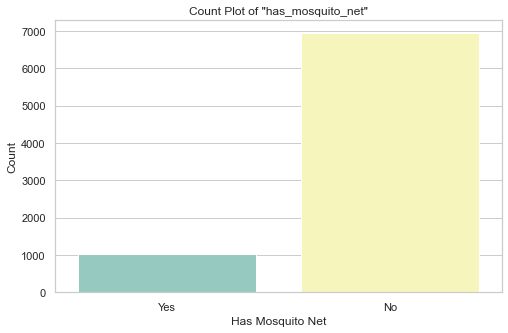

In [36]:
# Household has a mosquito net

# Mapping the variable labels to the column
household_has_mosquito_net = malaria_df['has_mosquito_net'].map(variable_label_has_net).reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='has_mosquito_net', data=household_has_mosquito_net, palette="Set3")
plt.title('Count Plot of "has_mosquito_net"')
plt.xlabel('Has Mosquito Net')
plt.ylabel('Count')
plt.show()

In [37]:
malaria_df.shape

(7952, 1656)

In [38]:
correlation_matrix = malaria_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)

plt.title("One-Sided Correlation Matrix Heatmap")
plt.show()

ValueError: could not convert string to float: '       2   1'

## 2.4) Building Model

* Model Interpretability and Explainability:

Enhance model interpretability to provide actionable insights for decision-makers by employing techniques such as SHAP values or feature importance analysis.


## 2.5) Conclusion

## 2.6) Recommendation

## 2.7) Model Deployment